# Survivors of Titanic



__Variable Notes__

pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way... Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way... Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

In [85]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [86]:
# Creating relavent datasets

trainDF = pd.read_csv("train.csv")
testDF = pd.read_csv("test.csv")
genderSub = pd.read_csv("gender_submission.csv")

In [87]:
# Reviewing the data types and number null values in the data set using .info()

trainDF.info()
print('-----------------')
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           

From this output we can deduce the following:

For the training dataset:
 - 177 missing entries for the Age column
 - 687 missing entries for the Cabin column
 - 2 missing entries for the Embarked column

For the test dataset:
 - 86 missing entries for the Age column
 - 1 missing entry for the Fare column
 - 327 missing entries for the Embarked column

In [88]:
# Having a look at the first few rows of each dataset
trainDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
testDF.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [90]:
# Lets drop the columns that will not be used for the predictions

trainDF.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
testDF.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

### Data Visualization

Lets begin by finding out the surviability of each passenger based on Sex, Pclass and Embarked values in a countplot form.

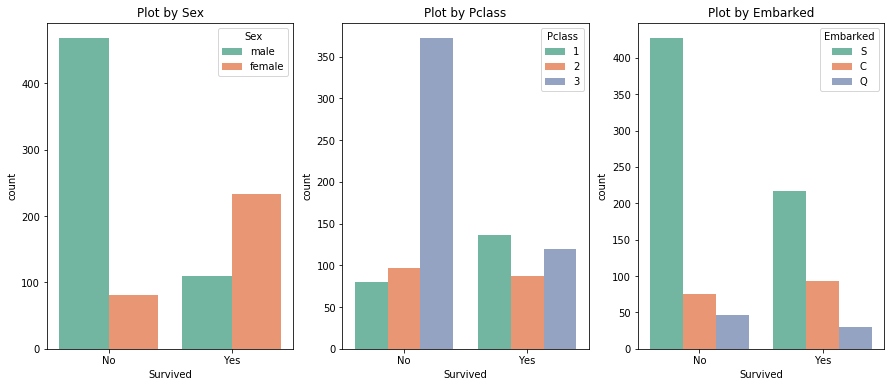

In [91]:
varList = ['Sex', 'Pclass', 'Embarked']

# Creating subplots
fig1, axes1 = plt.subplots(1,3, figsize=(15,6))
for index in range(3):
    sns.countplot(x='Survived', hue=varList[index], data=trainDF, palette='Set2', ax=axes1[index])
    axes1[index].set_xticklabels(['No', 'Yes'])
    axes1[index].set_title('Plot by '+ varList[index])

Great, the following observations can be made based of the countplots:
 - Females had a higher chance of surviving
 - Passengers from Pclass 3 had a significantly lower survivability rate
 - Passengers embarked from S had a significantly lower survivability rate
 

In [92]:
trainDF.loc[(trainDF['Embarked']=='S')].Pclass.value_counts()

3    353
2    164
1    127
Name: Pclass, dtype: int64

This tally seems to follow our observation made from the countplots, i.e. passenger count embarking from class S were classified as Pclass 3 both of which had a low survivability rate.

The following are countplots depicting gender survivability of passengers from Pclass 1 and 3.

Text(0.5,1,'Pclass 3 survival by Sex')

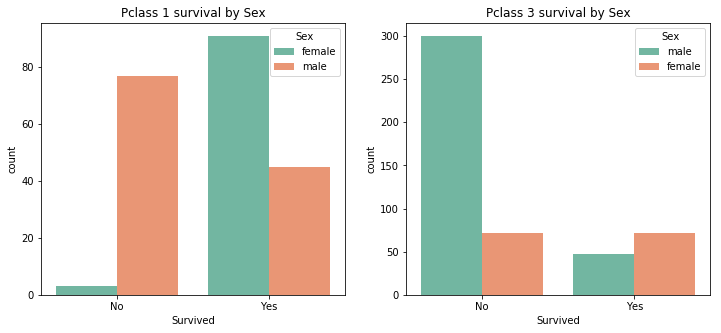

In [93]:
fig1, axes1 = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='Survived', hue='Sex', data=trainDF.loc[trainDF['Pclass']==1], palette='Set2', ax=axes1[0])
axes1[0].set_xticklabels(['No', 'Yes'])
axes1[0].set_title('Pclass 1 survival by Sex')

sns.countplot(x='Survived', hue='Sex', data=trainDF.loc[trainDF['Pclass']==3], palette='Set2', ax=axes1[1])
axes1[1].set_xticklabels(['No', 'Yes'])
axes1[1].set_title('Pclass 3 survival by Sex')

In [24]:
print('Survived Pclass 1')
print(trainDF.loc[(trainDF['Pclass']==1) & (trainDF['Survived']==1)].Sex.value_counts())
print('Not Survived Pclass 1')
print(trainDF.loc[(trainDF['Pclass']==1) & (trainDF['Survived']==0)].Sex.value_counts())

Survived Pclass 1
female    91
male      45
Name: Sex, dtype: int64
Not Survived Pclass 1
male      77
female     3
Name: Sex, dtype: int64


In [94]:
print('Survived Pclass 3')
print(trainDF.loc[(trainDF['Pclass']==3) & (trainDF['Survived']==1)].Sex.value_counts())
print('Not Survived Pclass 3')
print(trainDF.loc[(trainDF['Pclass']==3) & (trainDF['Survived']==0)].Sex.value_counts())

Survived Pclass 3
female    72
male      47
Name: Sex, dtype: int64
Not Survived Pclass 3
male      300
female     72
Name: Sex, dtype: int64


Up untill this point the data has pointed towards females having a higher survivability. For Pclass 1 only 3% died while for Pclass 3 half the women did not survive. For men, in Pclass 1 37% of them survived while in Pclass 3 around 14% of them survived. 

There definelty is some pattern for survivability when looking at Sex and Class(with some notion of the embarkment point also playing a factor)

Moving forward, lets look at now if a passenger's survivability was affected if they came as a family of just and individual. 

'Survived'

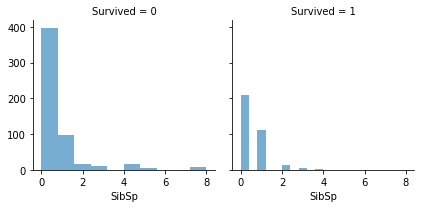

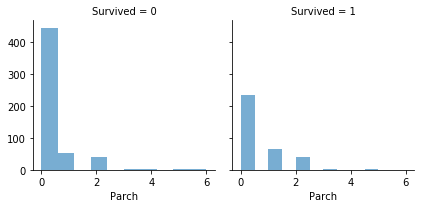

In [95]:
## Function to plot histogram given a condition

def conditional_hist(df, plot_cols, grid_cols):
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_cols)
        grid1.map(plt.hist, col, alpha=0.6)
    return grid_cols
    
cols = ["SibSp", "Parch"]
conditional_hist(trainDF, cols, 'Survived')

Passengers travelling as a family seemed to have a better shot at surviving than single travellers.

Lets make a simpler plot by creating a new column which classified the passengers as with family or single.

In [98]:
# Calculating total family members for each passenger
trainDF['TotMemb'] = trainDF['Parch']+trainDF['SibSp']

# If the count of memebers greater than 0 label as 'With Family' otherwise 'Signle'
trainDF.loc[(trainDF['TotMemb']>0), 'Family'] = 'With Family'
trainDF.loc[(trainDF['TotMemb']==0), 'Family'] = 'Single'

del trainDF['TotMemb']

# Doing the same for the test dataset
testDF['TotMemb'] = testDF['Parch']+testDF['SibSp']

# If the count of memebers greater than 0 label as 'With Family' otherwise 'Signle'
testDF.loc[(testDF['TotMemb']>0), 'Family'] = 'With Family'
testDF.loc[(testDF['TotMemb']==0), 'Family'] = 'Single'

del testDF['TotMemb']

Text(0.5,1,'Plot by Family')

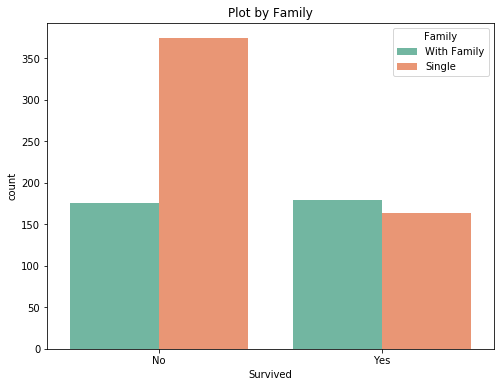

In [99]:
# Create plot for Family and Survived

fig1, axes1 = plt.subplots(1,1 , figsize=(8,6))

sns.countplot(x='Survived', hue='Family', data=trainDF, palette='Set2', ax=axes1)
axes1.set_xticklabels(['No', 'Yes'])
axes1.set_title('Plot by Family')

It is evident that passengers travelling with family had a better chance of surviving. Before further disecting the family stats, to see whether the passengers from the same family survived, we will continue with having a closer look at the Age variable. 

C:\Users\Siddharth\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Siddharth\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


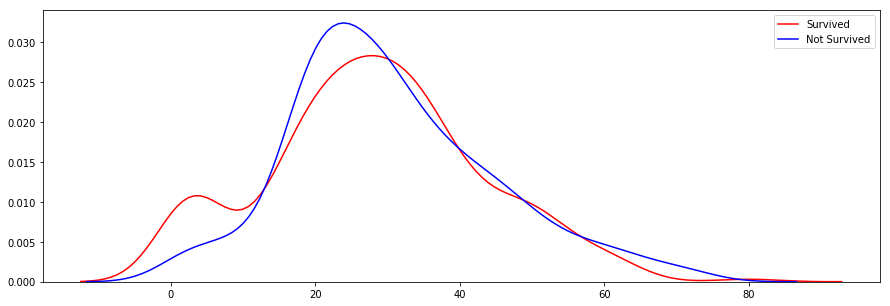

In [100]:
# Survived KDE plot by age

fig, ax = plt.subplots(figsize=(15,5))
sns.kdeplot(trainDF['Age'].loc[(trainDF['Survived']==1)], color='r', label='Survived')
sns.kdeplot(trainDF['Age'].loc[(trainDF['Survived']==0)], color='b', label='Not Survived')

Lets analyse this curve - babies seem to have better survival rate mostly dude to human nature and were probably carried in first along with the women. There seems a dip in survivability occuring for children at the age of 10(the total number of childern at the age of 10 might have a role to play in this). The survivabilty seems to be increse and somewhat maintain until the age of 40. After which the rate dips lower and lower

In [101]:
# First lets quickly check children aged 10

trainDF.loc[(trainDF['Age']>=9) & (trainDF['Age']<=11) ].Age.value_counts()

9.0     8
11.0    4
10.0    2
Name: Age, dtype: int64

As propsed, there are only 2 children aged 10 so the dip is justified. 

With this the visualization of the data comes to an end. Now we will deal with all the missing values

### Missing Values & Feature Engineering
Lets have a look at all the features and how many missing values does each have. Then we will try to appropriately fill them.

In [102]:
# Let's check how many missing values we have in the final dataset

print('Training Set')
print(trainDF.isnull().sum())
print('-----------------')
print('Test Set')
print(testDF.isnull().sum())

Training Set
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Family        0
dtype: int64
-----------------
Test Set
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Family          0
dtype: int64


Text(0.5,1,'Boxplot showing Fare against Embarked')

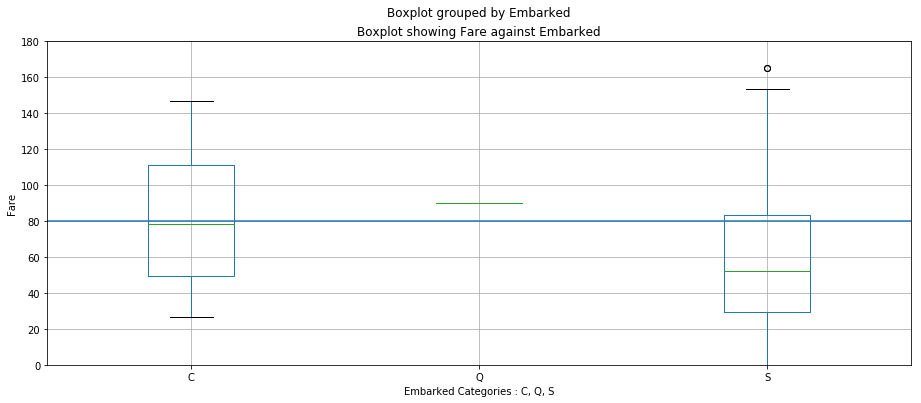

In [103]:
# Lets fill the 2 missing values from Embarked in the training set

temp = trainDF.loc[(trainDF['Pclass']==1) ]

# Make the boxplot

dims=(15,6)
fig, ax = plt.subplots(figsize=dims)
ymin = 0
ymax = 180
ax.set_ylim([ymin, ymax])
temp.boxplot('Fare', by='Embarked', ax=ax)

# Add a horizontal line at 80 (fare for the missing embarked entries) 

plt.axhline(y=80, xmin=0, xmax=1, hold=None)

# Labels and title for the plot
plt.xlabel('Embarked Categories : C, Q, S')
plt.ylabel('Fare')
plt.title('Boxplot showing Fare against Embarked')

In [104]:
# Fill the missing values in

trainDF['Embarked'].fillna('C', inplace=True)

In [105]:
# Next lets fill in the 1 missing fare value from test set
testDF[testDF['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
152,1044,3,male,60.5,0,0,NaN,S,Single


In [106]:
# We will extrapolate the mean fare for Pclass=3 & Embarked=S
meanPclass3 = trainDF.loc[(trainDF['Pclass']==3) & (trainDF['Embarked']=='S')].Fare.mean()

# Fill in the value
testDF['Fare'].fillna(meanPclass3, inplace=True)

C:\Users\Siddharth\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Siddharth\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


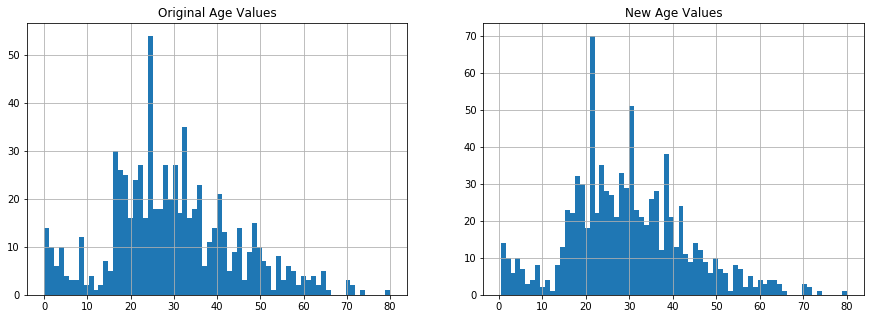

In [107]:
# Thanks to Omar El Gabry (A Journey through Titanic) for this next section in filling out the Age NaNs. 

# Set up the comparative histograms for before and after missing Age values have been filled
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.set_title('Original Age Values')
ax2.set_title('New Age Values')

# Calculate the mean, standard deviation and total number of NaNs
mean = trainDF['Age'].mean()
std = trainDF['Age'].std()
noOfNaNs = trainDF['Age'].isnull().sum()

mean1 = testDF['Age'].mean()
std1 = testDF['Age'].std()
noOfNaNs1 = testDF['Age'].isnull().sum()

np.random.seed(42)
# Create random numbers between std above and below the mean
random1 = np.random.randint(mean-std, mean+std, size=noOfNaNs)
random2 = np.random.randint(mean1-std1, mean1+std1, size=noOfNaNs1)

# Create histogram for original age values
trainDF['Age'].dropna().astype(int).hist(bins=70, ax=ax1)

# Set the NaN missing values to the newly generated random numbers above
trainDF['Age'][np.isnan(trainDF['Age'])] = random1
testDF['Age'][np.isnan(testDF['Age'])] = random2

# Create histogram for the new age values
trainDF['Age'].hist(bins=70, ax=ax2)

Now that all the missing values have been filled in lets move to creating bins for the Age column. This is giving us an improvement in the prediction.

In [108]:
# Create bins
bins = np.linspace(0.42, 80, 9)
print("bins: {}".format(bins))

# Binning training set
which_bin = np.digitize(trainDF['Age'], bins=bins)
print("\nData points:\n", trainDF['Age'][:5])
print("\nBin membership for data points:\n", which_bin[:5])

# Binning test set
which_bin2 = np.digitize(testDF['Age'], bins=bins)

bins: [ 0.42   10.3675 20.315  30.2625 40.21   50.1575 60.105  70.0525 80.    ]

Data points:
 0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

Bin membership for data points:
 [3 4 3 4 4]


In [109]:
# Get dummy variables for the Pclass feature and name the columns

pclass_dummies_titanic  = pd.get_dummies(trainDF['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']


pclass_dummies_test  = pd.get_dummies(testDF['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']

In [110]:
# Review training and test sets
print("Train features:\n", list(trainDF.columns), "\n")
print("Test features:\n", list(testDF.columns), "\n")

Train features:
 ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family'] 

Test features:
 ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family'] 



In [111]:
# Get dummies for the rest of the features

train_dummies = pd.get_dummies(trainDF)
test_dummies = pd.get_dummies(testDF)

# Join the Pclass dummies and the binned ages
train_dummies = train_dummies.join(pclass_dummies_titanic)
test_dummies    = test_dummies.join(pclass_dummies_test)
train_dummies['AgeBinned'] = which_bin
test_dummies['AgeBinned'] = which_bin2

# Review training and test sets
print("Train Features after get_dummies:\n", list(train_dummies.columns))
print("Test Features after get_dummies:\n", list(test_dummies.columns))

Train Features after get_dummies:
 ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Family_Single', 'Family_With Family', 'Class_1', 'Class_2', 'Class_3', 'AgeBinned']
Test Features after get_dummies:
 ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Family_Single', 'Family_With Family', 'Class_1', 'Class_2', 'Class_3', 'AgeBinned']


In [112]:
# Let's drop some of the columns that are redundant

train_dummies.drop(['Parch', 'SibSp', 'Pclass', 'Age'], axis=1, inplace=True)
test_dummies.drop(['Parch', 'SibSp', 'Pclass', 'Age'], axis=1, inplace=True)

# Review final training and test datasets
print(train_dummies.info())
print(test_dummies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived              891 non-null int64
Fare                  891 non-null float64
Sex_female            891 non-null uint8
Sex_male              891 non-null uint8
Embarked_C            891 non-null uint8
Embarked_Q            891 non-null uint8
Embarked_S            891 non-null uint8
Family_Single         891 non-null uint8
Family_With Family    891 non-null uint8
Class_1               891 non-null uint8
Class_2               891 non-null uint8
Class_3               891 non-null uint8
AgeBinned             891 non-null int64
dtypes: float64(1), int64(2), uint8(10)
memory usage: 29.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId           418 non-null int64
Fare                  418 non-null float64
Sex_female            418 non-null uint8
Sex_male              418 non-null uint8
Embarked_C            

Ok, it looks like we have accounted for everything. Lets look at it as a heatmap

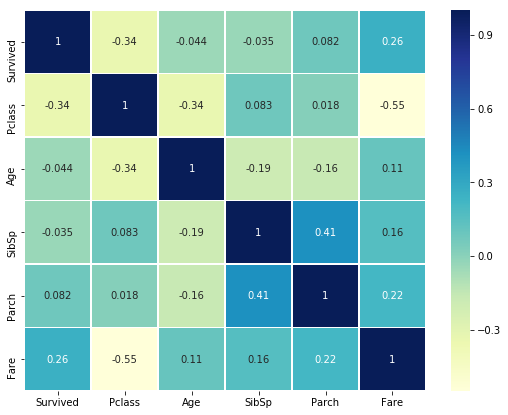

In [113]:
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(trainDF.corr(),annot=True,linewidths=.5, ax=ax, cmap="YlGnBu")

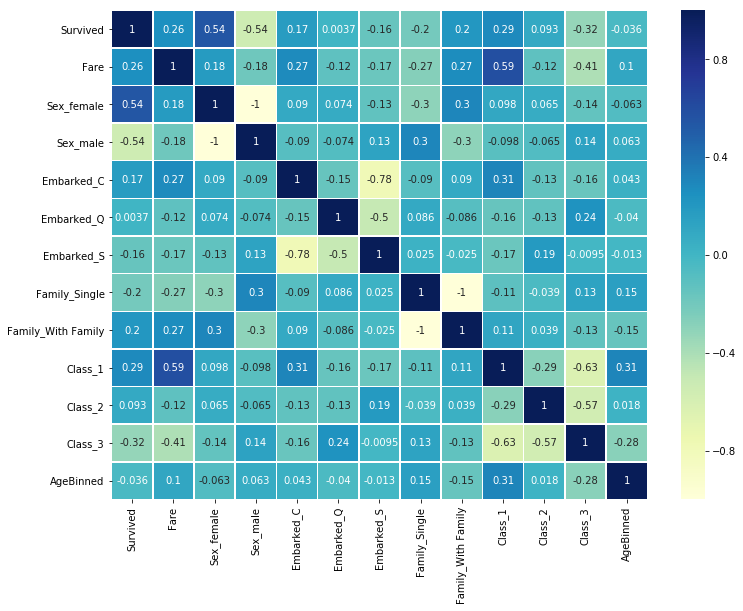

In [114]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(train_dummies.corr(),annot=True,linewidths=.5, ax=ax, cmap="YlGnBu")

This heatmap gives insight into the correlation between the different features. Taking a closer look at the correlations with Survived, we can see that gender has higher correlation as expected. Similarly, the Class 1 & 3 are also. 

We are now ready to start building our prediction model. 

In [115]:
# Create training and test sets

X_train = train_dummies.iloc[:,1:13]
y_train = train_dummies.iloc[:,0]
X_test = test_dummies.iloc[:,1:13]

In [116]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Imports for parameter setting and validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

We will run a few algorithms first and see their results. Then we will select one with a good performance and tune the model to improve it further.

In [117]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('LinearSVC', LinearSVC(random_state=0)))
models.append(('SVC', SVC()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier(random_state=0)))
models.append(('Gradient Boosting', GradientBoostingClassifier()))

for name, model in models:
    clf = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Model: "+name)
    print("Train Set Score: {}".format(model.score(X_train, y_train)))
    print("---------------")

Model: Logistic Regression
Train Set Score: 0.7946127946127947
---------------
Model: KNeighborsClassifier
Train Set Score: 0.8372615039281706
---------------
Model: GaussianNB
Train Set Score: 0.7665544332210998
---------------
Model: LinearSVC
Train Set Score: 0.7856341189674523
---------------
Model: SVC
Train Set Score: 0.8383838383838383
---------------
Model: DecisionTreeClassifier
Train Set Score: 0.9483726150392817
---------------
Model: Random Forest
Train Set Score: 0.9349046015712682
---------------
Model: Gradient Boosting
Train Set Score: 0.8911335578002245
---------------


Even though Decision Tree has a better score I would like to select Random Forrest and see if we can get the score to be better

Let us first select the features for which we will be using SelectFromModel

In [118]:
from sklearn.feature_selection import SelectFromModel

#RandomForestClassifier
select = SelectFromModel(
RandomForestClassifier(n_estimators=100, random_state=0),
threshold="median")
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (891, 12)
X_train_selected.shape: (891, 6)


The feature count went from 12 to 6

In [119]:
print(X_train.info())
select.get_support()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Fare                  891 non-null float64
Sex_female            891 non-null uint8
Sex_male              891 non-null uint8
Embarked_C            891 non-null uint8
Embarked_Q            891 non-null uint8
Embarked_S            891 non-null uint8
Family_Single         891 non-null uint8
Family_With Family    891 non-null uint8
Class_1               891 non-null uint8
Class_2               891 non-null uint8
Class_3               891 non-null uint8
AgeBinned             891 non-null int64
dtypes: float64(1), int64(1), uint8(10)
memory usage: 22.7 KB
None


array([ True,  True,  True, False, False, False, False, False,  True,
       False,  True,  True])

The final features are as follows: Fare, Sex_female, Sex_male, Class_1, Class_3, AgeBinned.

Embarked and Family were removed.

In [80]:
# Select features for test as well using transform

X_test_selected = select.transform(X_test)

# Let's compare the scores for both the original and reduced features
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(rfc.score(X_train, y_train)))
rfc.fit(X_train_selected, y_train)
print("Score with selected features: {:.3f}".format(rfc.score(X_train_selected, y_train)))

Score with all features: 0.935
Score with selected features: 0.923


In [81]:

# RandomForestClassifier

# Create the grid of values for the C parameter
param_grid = {'n_estimators' : [1,3,5,10,100],
             'min_samples_leaf' : [1,3,5,10,50,100,200,500]} 
print('Parameter Grid : \n{}\n'.format(param_grid))

# We will implement a grid search with a stratified 3 folds cross validation using the Random Forest estimator
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=3)

# Fit the estimator on the training data and predict on test data
grid_search.fit(X_train_selected, y_train)
y_pred = grid_search.predict(X_test_selected)
y_trainpred = grid_search.predict(X_train_selected)

# Outputs
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score (on Training Data): {:.2f}\n".format(grid_search.best_score_))
print("Classification report: \n{}".format(classification_report(y_train, y_trainpred)))
print("Confusion Matrix: \n{}\n".format(confusion_matrix(y_train, y_trainpred)))
print('Train Set score using RandomForestClassifier: {:.3f}'.format(grid_search.score(X_train_selected, y_train)))

Parameter Grid : 
{'n_estimators': [1, 3, 5, 10, 100], 'min_samples_leaf': [1, 3, 5, 10, 50, 100, 200, 500]}

Best parameters: {'min_samples_leaf': 3, 'n_estimators': 100}
Best cross-validation score (on Training Data): 0.81

Classification report: 
             precision    recall  f1-score   support

          0       0.88      0.95      0.91       549
          1       0.90      0.79      0.84       342

avg / total       0.89      0.89      0.88       891

Confusion Matrix: 
[[520  29]
 [ 72 270]]

Train Set score using RandomForestClassifier: 0.887


It seems like we are misclassifying some instances

In [82]:
misclassified_samples = X_train[y_train != y_trainpred]
misclassified_samples.shape

(101, 12)

101 are being missclassified out of 891

In [83]:
temp = trainDF.iloc[misclassified_samples.index,:]
temp.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
2,1,3,female,26.0,0,0,7.9250,S,Single
14,0,3,female,14.0,0,0,7.8542,S,Single
17,1,2,male,34.0,0,0,13.0000,S,Single
18,0,3,female,31.0,1,0,18.0000,S,With Family
21,1,2,male,34.0,0,0,13.0000,S,Single
25,1,3,female,38.0,1,5,31.3875,S,With Family
32,1,3,female,35.0,0,0,7.7500,Q,Single
36,1,3,male,21.0,0,0,7.2292,C,Single
41,0,2,female,27.0,1,0,21.0000,S,With Family
55,1,1,male,38.0,0,0,35.5000,S,Single


In [84]:
print('Misclassified Pclass')
print(temp['Pclass'].loc[temp['Survived']==1].value_counts())
print('-------------------------------')
print('Misclassified Sex')
print(temp['Sex'].loc[temp['Survived']==1].value_counts())
print('-------------------------------')
print('Misclassified Family')
print(temp['Family'].loc[temp['Survived']==1].value_counts())
print('-------------------------------')
print('Misclassified Embarked')
print(temp['Embarked'].loc[temp['Survived']==1].value_counts())

Misclassified Pclass
3    48
1    16
2     8
Name: Pclass, dtype: int64
-------------------------------
Misclassified Sex
male      60
female    12
Name: Sex, dtype: int64
-------------------------------
Misclassified Family
Single         49
With Family    23
Name: Family, dtype: int64
-------------------------------
Misclassified Embarked
S    46
C    20
Q     6
Name: Embarked, dtype: int64


This model gets a score of 0.80861 on the unseen test set.